### Canny边缘检测
Canny边缘检测是一个非常流行的边缘检测算法，可以分为以下几个步骤完成：  
(1) 噪声去除，因为边缘检测容易受噪声影响，所以第一步是用5*5的高斯滤波器去除噪声；  
(2) 计算图像梯度：对平滑后的图像使用sobel算子计算水平方向和垂直方向的一阶导数；  
(3) 非极大值抑制：获得梯度大小和方向后，对整个图进行扫描，去除那些非边界上的点，对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的。如下所示：
<center><img src="pic/canny.png" alt="FAO" width="200"></center>
上图中的数字代表了像素点的梯度强度，箭头方向代表了梯度方向。以第二排第三个像素点为例，由于梯度方向向上，则将这一点的强度（7）与其上下两个像素点的强度（5和4）比较，由于这一点强度最大，则保留;  

(4) 滞后阈值：确定哪些边界才是真正的边界，两个阈值minVal、maxVal。高于maxVal的，则认为是真边界；介于maxVal和minVal之间的，若与真边界相连则保留，否则舍弃；低于minVal的，舍弃。  

### Canny使用 
在OpenCV中只需要一个函数： cv2.Canny()，就可以完成以上几步。这个函数的第一个参数是输入图像。第二和第三个分别是minVal和maxVal。第四个参数设置用来计算图像梯度的Sobel卷积核的大小，默认值为3。最后一个参数是 L2gradient，它可以用来设定求梯度大小的方程。如果设为True，就会使用我们上面提到过的方程：$G=\sqrt{(G_x^2+G_y^2 )}$，否则使用方程：$G=|G_x^2|+|G_y^2|$代替，默认值为 False。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [2]:
def edge_detection(image, minVal=100, maxVal=200):
    '''用cv2.Canny()进行边界检测'''
    # 1、噪声去除，用高斯滤波器
    image = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=0, sigmaY=1)
    # 2、用cv2.Canny()，（包括了计算图像梯度，非极大值抑制，滞后阈值）
    edges = cv2.Canny(image, threshold1=minVal, threshold2=maxVal)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()

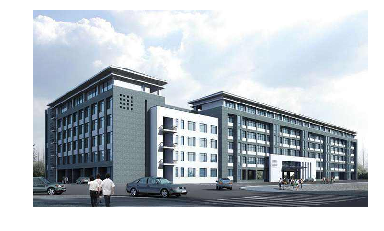

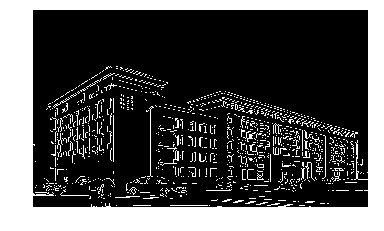

In [3]:
image = imread('./image/school.jpg')
show(image)
# 把图片转换为灰度图
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edge_detection(image, minVal=100, maxVal=200)

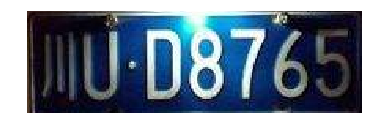

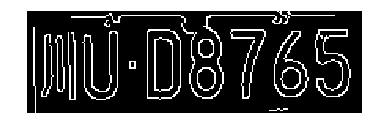

In [4]:
image = imread('./image/license_plate.png')
show(image)
# 把图片转换为灰度图
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edge_detection(image, minVal=100, maxVal=200)

可以看出，Canny边缘检测的效果确实不错。

##### 8.2 设置三组不同的阈值，查看效果

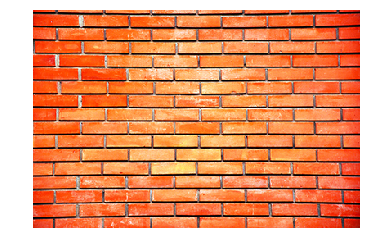

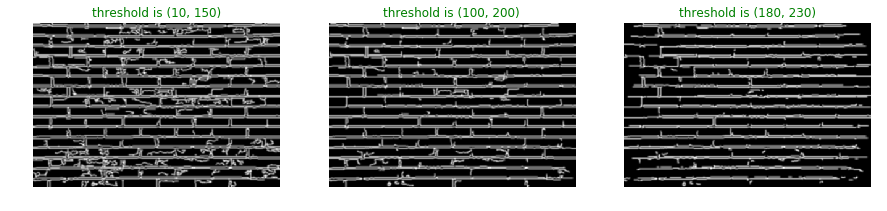

In [5]:
values = [(10,150), (100,200), (180,230)]    # 三组有小到大的阈值
image = imread('./image/bricks.png')
show(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 噪声去除，用高斯滤波的方法
image = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=0, sigmaY=1)
plt.figure(figsize=(15,10))
for i,(minVal, maxVal) in enumerate(values):
    plt.subplot(1,3,i+1)
    edges = cv2.Canny(image, threshold1=minVal, threshold2=maxVal)
    # 对得到的边界再用高斯滤波平滑处理一下
    edges = cv2.GaussianBlur(edges, (5,5), sigmaX=0, sigmaY=1)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.title('threshold is '+str(values[i]), color='green')
plt.show()

可以看出，阈值越小保留的信息就越多；太大时，则会有一些信息缺失。

##### 8.3 伪自动确定阈值的方法
根据图像的中值来确定最大最小阈值。

In [6]:
# 虽说是自动确定阈值的方法，但是这种方法效果一般
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0-sigma)*v))
    upper = int(min(255, (1.0+sigma)*v))
    image = cv2.GaussianBlur(image, (5,5), sigmaX=0, sigmaY=1)
    edges = cv2.Canny(image, lower, upper)
    print('自动确定的阈值为', str((lower, upper)))
    return edges

自动确定的阈值为 (103, 204)


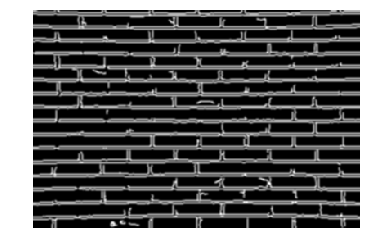

In [7]:
image = imread('./image/bricks.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = auto_canny(image)
edges = cv2.GaussianBlur(edges, (5,5), sigmaX=0, sigmaY=1)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

有一个自动确定Canny高低阈值的方法，该方法重新写了Canny()的流程，所以执行起来费时间。（文件详见08Canny_adaptive_threshold.py）